In [41]:
""" This notebook has : 
1. Function to replace values in a column.
2. Function to plot the correlation matrix for the dataframe
3. Using these functions to : 
        a. Make store_and_fwd_flag numerical categorical.
        b. Plot correlation matrix.
        c. Make a pickup_weeked_or_not variable.
4. Starts the process of creating higher level categories."""

' This notebook has : \n1. Function to replace values in a column.\n2. Function to plot the correlation matrix for the dataframe\n3. Using these functions to : \n        a. Make store_and_fwd_flag numerical categorical.\n        b. Plot correlation matrix.\n        c. Make a pickup_weeked_or_not variable.\n4. Starts the process of creating higher level categories.'

In [6]:
# Importing modules

import pandas as pd # for data wrangling
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
import missingno as msno # for visualizing missing values in data
import numpy as np # for array computations

plt.style.use('ggplot') # setting style for matplotlib

In [2]:
# Loading the data

train_df = pd.read_csv("train_day_date_minutes.gz", compression = 'gzip')

del train_df['Unnamed: 0']

In [12]:
# First few data points

train_df['dropoff_longitude_exp'] = np.exp(train_df['dropoff_longitude'])

In [10]:
'''This function takes in a dataframe and plots the correlation matrix between each of it's 
columns'''

def plot_correlation_matrix(dataframe):

    fig, ax = plt.subplots(figsize=(10,10)) 
    
    correlation_matrix = dataframe.corr()

    sns.heatmap(correlation_matrix, 
            xticklabels=correlation_matrix.columns.tolist(),
            yticklabels=correlation_matrix.columns.tolist(),
            ax = ax)

    plt.show()

In [5]:
'''This function takes in a "dataframe" and a "column_name" in which it has to replace
values. It takes an "original" value and replaces it by the value of the "replacement".'''

def replace_column_values(dataframe, column_name, original, replacement):
    dataframe.replace({column_name:{original : replacement}}, inplace = True)

In [6]:
# Converting the store_and_fwd_flag to a numerical categorical variable by encoding Y:1,N:0.

replace_column_values(train_df, 'store_and_fwd_flag','Y', 1)
replace_column_values(train_df, 'store_and_fwd_flag','N', 0)

In [4]:
train_df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,dropoff_date,dropoff_day,trip_in_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,Monday,2016-03-14,Monday,7
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,Sunday,2016-06-12,Sunday,11
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,Tuesday,2016-01-19,Tuesday,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,Wednesday,2016-04-06,Wednesday,7
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,Saturday,2016-03-26,Saturday,7


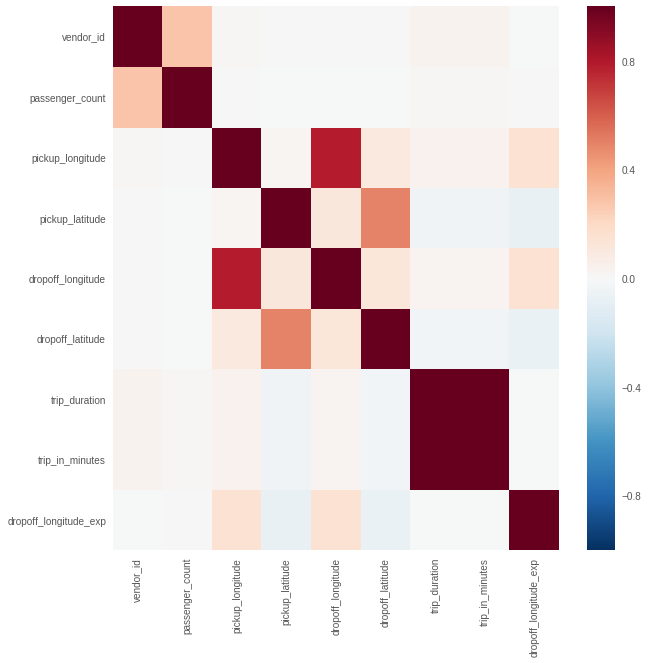

In [13]:
# Calling the plot_correlation_matrix function on the training dataset

plot_correlation_matrix(train_df)

In [27]:
# Observations from the correlation matrix
'''1. dropoff_longitude is closely positively related to the pickup_logitude. Indicates
that trip distances are usually the same amount.
2. dropoff_latitude is also closely, though less, postivelt related to the dropoff_longitude.
3. store_and_fwd_flag is extremely positively correlated with te dropoff_latitude. Perhaps
implies that the higher vendor code vendor operates at higher latitudes primarily. Can
we find out their exact loations of working?'''

'1. dropoff_longitude is closely positively related to the pickup_logitude. Indicates\nthat trip distances are usually the same amount.\n2. dropoff_latitude is also closely, though less, postivelt related to the dropoff_longitude.\n3. store_and_fwd_flag is extremely positively correlated with te dropoff_latitude. Perhaps\nimplies that the higher vendor code vendor operates at higher latitudes primarily. Can\nwe find out their exact loations of working?'

In [9]:
# Creating Higher Level Categories
# 1. Creating Weekends and Weekdays
# Encoding - Saturday : 1 Sunday : 1 . All others : 0

train_df['pickup_weekend_or_not'] = train_df['pickup_day']
replace_column_values(train_df, 'pickup_weekend_or_not','Saturday', 1)
replace_column_values(train_df, 'pickup_weekend_or_not','Sunday', 1)
replace_column_values(train_df, 'pickup_weekend_or_not','Monday', 0)
replace_column_values(train_df, 'pickup_weekend_or_not','Tuesday', 0)
replace_column_values(train_df, 'pickup_weekend_or_not','Wednesday', 0)
replace_column_values(train_df, 'pickup_weekend_or_not','Thursday', 0)
replace_column_values(train_df, 'pickup_weekend_or_not','Friday', 0)


In [10]:
'''This function saves the data sent in "dataframe" as "save_as.gz". It also runs sanity check
   to see if it was saved and loaded correctly. NEEDS WORK!'''

def save_dataframe(dataframe, save_as):
    dataframe.to_csv(save_as + ".gz", mode = 'w', compression='gzip', index = 'False', encoding='UTF-8')
    test_df = pd.read_csv(save_as + ".gz", compression='gzip', encoding='UTF-8')
    del test_df['Unnamed: 0']
    
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [11]:
# Saving this modified dataframe

save_dataframe(train_df, 'train_after_further_explorations')

Warning -- equivalence test!!! Double-check.


In [ ]:
'''Issues.
1. Heatmap does not show pickup_weeekend_or_not variable in x axis.
2. Read up on how much of correlation is statistically significant.
3. Make a github repo and upload notebooks.'''